# Sales Analysis

import libraries

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

get files names using os.listdir

In [3]:
files = [file for file in os.listdir("./Sales_Data")]
#print(files)

#### Importing Files

Reading each file individually and then concatenete them into a single DataFrame

In [4]:
paths = []
for m in files:
    paths.append(f"./Sales_Data/{m}")
    
df = pd.concat(map(pd.read_csv, paths))
df.shape

(186850, 6)

In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### What was the best month for sales? How much was earned that month?

#### Cleaning the data
droping heading values that were copied into the dataset, droping NaN values

In [6]:
df = df.drop(df[df['Order Date'] == 'Order Date'].index)
df.dropna(inplace=True)
df.shape

(182735, 6)

setting the correct data types to columns

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [8]:
df['Total'] = df['Quantity Ordered']*df['Price Each']

In [10]:
monthly = df.groupby(df['Order Date'].dt.month)['Total'].sum()
print(f'the greater sales amount was for {monthly.max():,.2f}')

the greater sales amount was for 4,557,905.42


<AxesSubplot:xlabel='Order Date'>

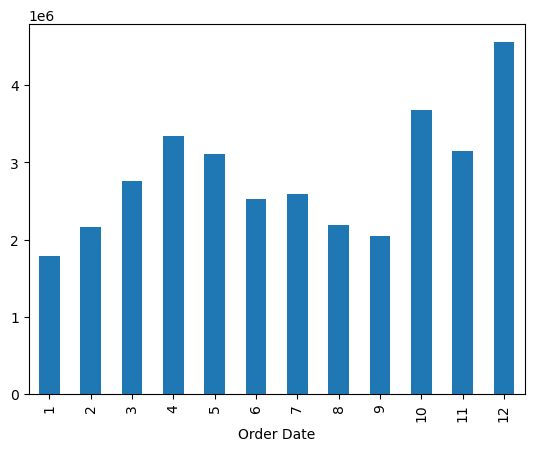

In [11]:
monthly.plot.bar()

### What city has the greates number of sales?

In [16]:
df['Purchase Address'] = df['Purchase Address'].astype('string') #convert the object type into string

In [17]:
df['Purchase Address'].dtype

string[python]

I could have used the `.apply()` method, `df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])`

In [31]:
#df['City'] = df['Purchase Address'].str.split(',').str[1]
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1] + ' (' + x.split(',')[2].split(' ')[1] + ')')
cities = df.groupby(df['City'])['Total'].sum()
cities.sort_values()

City
 Portland (ME)          444,110.53
 Austin (TX)          1,786,745.52
 Portland (OR)        1,832,538.71
 Seattle (WA)         2,693,048.60
 Dallas (TX)          2,717,793.72
 Atlanta (GA)         2,741,642.05
 Boston (MA)          3,604,080.86
 New York City (NY)   4,581,658.91
 Los Angeles (CA)     5,354,039.93
 San Francisco (CA)   8,124,120.94
Name: Total, dtype: float64

<AxesSubplot:xlabel='City'>

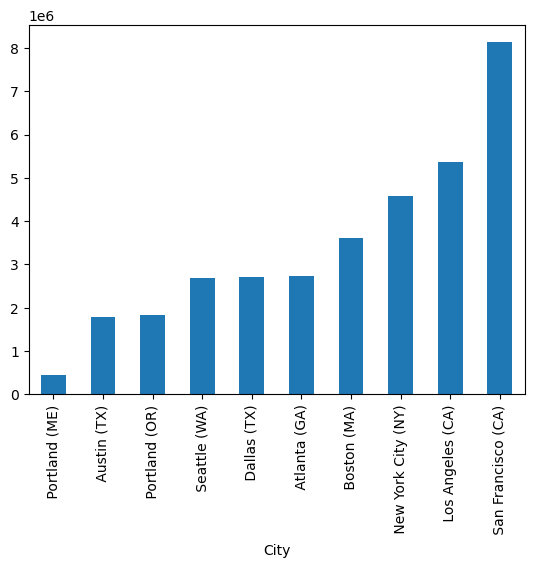

In [32]:
cities.sort_values().plot.bar()